#Theoretical

1. What is a Support Vector Machine (SVM)?

A Support Vector Machine (SVM) is a supervised learning algorithm for classification and regression. For classification it finds a decision boundary (a hyperplane) that best separates classes by maximizing the margin — the distance between the hyperplane and the nearest data points of any class (support vectors). SVMs can operate in original input space or implicitly map data into higher-dimensional spaces via kernels.



2. What is the difference between Hard Margin and Soft Margin SVM?

**Hard Margin SVM**: Requires perfect separation of classes (no misclassification). Works only when data are linearly separable and noise-free.

**Soft Margin SVM**: Allows some misclassifications by introducing slack variables (ξᵢ) and a penalty parameter C. Balances margin width and classification errors; robust to non-separable / noisy data.

3. What is the mathematical intuition behind SVM?

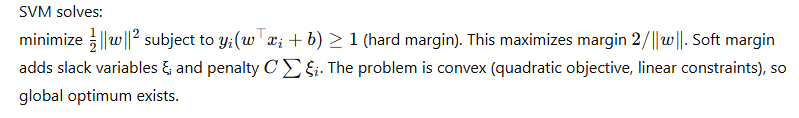

4. What is the role of Lagrange Multipliers in SVM?

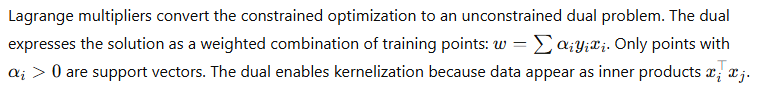

5. What are Support Vectors in SVM?

Support vectors are the training samples that lie on (or within, in soft margin) the margin boundaries and have non-zero Lagrange multipliers
**𝛼**𝑖. They determine the position of the decision boundary; removing other points typically does not change the classifier.

6. What is a Support Vector Classifier (SVC)?

SVC is SVM used for classification tasks (binary or multi-class via strategies like one-vs-one or one-vs-rest). In scikit-learn, SVC implements SVM classification with support for kernels.

7. What is a Support Vector Regressor (SVR)?

SVR applies SVM principles to regression. It fits a function that deviates from target values by at most ε for most points. The objective favors a flat function (small weights) while allowing some error within ε-insensitive tube; it uses slack variables and regularization parameter C.

8. What is the Kernel Trick in SVM?

The kernel trick replaces inner products in the dual problem with kernel functions
𝐾(
𝑥
𝑖
,
𝑥
𝑗
)
	, which compute inner products in some high-dimensional feature space without explicitly mapping to it. This enables non-linear decision boundaries with efficiency.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?

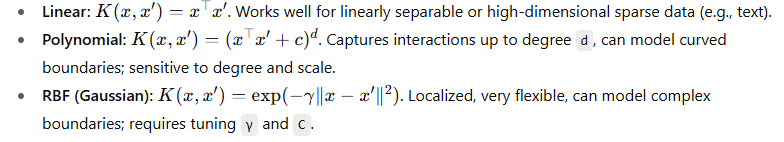

10. What is the effect of the C parameter in SVM?

C is the penalty for misclassification (regularization inverse). Large C → fewer margin violations (narrow margin, may overfit). Small C → allows more violations (wider margin, more regularization).

11. What is the role of the Gamma parameter in RBF Kernel SVM?

gamma defines the reach of a single training example (inverse of radius). Large gamma → tight, localized influence (complex decision boundary, can overfit). Small gamma → smoother, more global influence.

12. What is the Naïve Bayes classifier, and why is it called "Naïve"?

Naïve Bayes is a probabilistic classifier based on Bayes’ theorem with the naïve assumption that features are conditionally independent given the class. This simplification makes training and inference efficient.

13. What is Bayes’ Theorem?

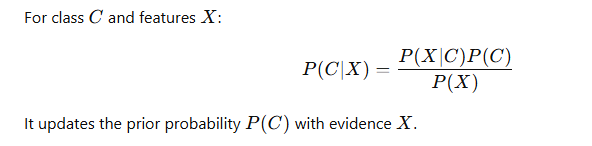

14.  Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

GaussianNB: Assumes continuous features follow a Gaussian distribution; uses mean & variance per feature/class.

MultinomialNB: For count data (word counts); models feature counts with multinomial distribution — common for text classification with bag-of-words.

BernoulliNB: For binary (0/1) features (presence/absence); models Bernoulli distributions per feature/class.

15. When should you use Gaussian Naïve Bayes over other variants?

Use GaussianNB when features are continuous and approximately normally distributed (e.g., many numeric sensor readings). For text counts, prefer Multinomial; for binary features, Bernoulli.

16. What are the key assumptions made by Naïve Bayes?

Conditional independence- 𝑃
(
𝑋
∣
𝐶
)
=∏
𝑖
𝑃
(
𝑋
𝑖
∣
𝐶
)
— often false in practice but classifier still works well.

Correct form of likelihood (Gaussian for GaussianNB, multinomial for MultinomialNB, Bernoulli for BernoulliNB).

17. What are the advantages and disadvantages of Naïve Bayes?

Advantages: fast, simple, works well with small data, handles high-dimensional data (text), requires few parameters.
Disadvantages: independence assumption unrealistic, poor probability calibration sometimes, can be less accurate than more flexible models.

18. Why is Naïve Bayes a good choice for text classification?

Text typically produces high-dimensional sparse count vectors; MultinomialNB handles counts efficiently, trains quickly, and often gives strong baseline performance for spam detection, news categorization, etc.

19.  Compare SVM and Naïve Bayes for classification tasks.

SVM: Discriminative, often better when decision boundary is complex, robust with kernels; can be slower to train on large datasets; often higher accuracy on many tasks.

Naïve Bayes: Generative, fast, good with high-dimensional sparse data (text), needs less data, simpler. Choice depends on data size, dimensionality, noise, and need for interpretability.

20. How does Laplace Smoothing help in Naïve Bayes?

Laplace smoothing (add-one smoothing) prevents zero probabilities for unseen feature-class combinations by adding a small constant (usually 1) to counts; avoids zeroing out the entire posterior probability.

#**Practical**

21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

In [2]:
# svm_iris.py
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies.

In [1]:
# svm_wine_compare.py
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

clf_lin = SVC(kernel='linear', C=1.0, random_state=42).fit(X_train, y_train)
clf_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42).fit(X_train, y_train)

print("Linear SVM accuracy:", accuracy_score(y_test, clf_lin.predict(X_test)))
print("RBF SVM accuracy:", accuracy_score(y_test, clf_rbf.predict(X_test)))


Linear SVM accuracy: 0.9555555555555556
RBF SVM accuracy: 0.7111111111111111


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE).

In [49]:
# Import libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# -------------------------------
# Generate synthetic housing-like dataset
# -------------------------------
X, y = make_regression(n_samples=500, n_features=8, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr_model.predict(X_test_scaled)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Optional: Compare first 10 predicted vs actual values
print("\nPredicted vs Actual values (first 10):")
for pred, actual in zip(y_pred[:10], y_test[:10]):
    print(f"Predicted: {pred:.3f}, Actual: {actual:.3f}")




Mean Squared Error (MSE): 731.3063644982933

Predicted vs Actual values (first 10):
Predicted: 58.134, Actual: 41.050
Predicted: -14.530, Actual: -9.941
Predicted: -40.456, Actual: -59.955
Predicted: 28.529, Actual: 25.816
Predicted: -38.125, Actual: -30.434
Predicted: 31.475, Actual: 23.970
Predicted: -88.837, Actual: -73.153
Predicted: 85.177, Actual: 92.933
Predicted: -117.778, Actual: -111.157
Predicted: 201.444, Actual: 199.119


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary.

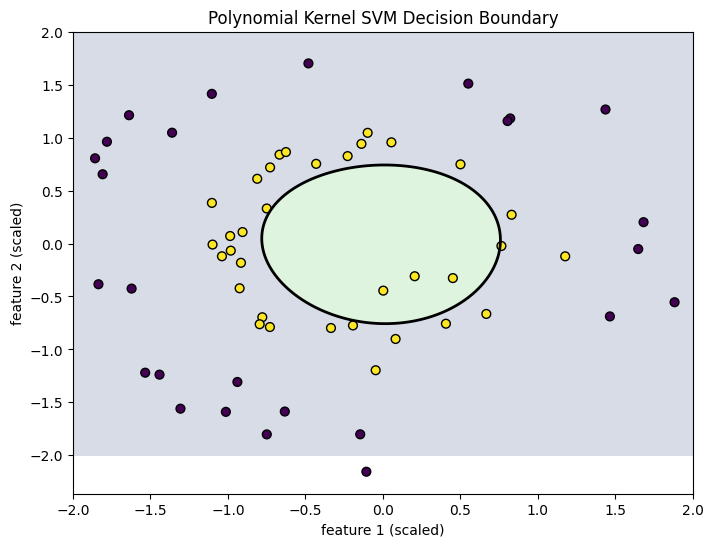

In [5]:
# svm_poly_decision_boundary.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create 2D non-linear data
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

clf = SVC(kernel='poly', degree=3, C=1.0, coef0=1.0, probability=False, random_state=42)
clf.fit(X_train_s, y_train)

# Plot
xx, yy = np.meshgrid(np.linspace(-2,2,500), np.linspace(-2,2,500))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_s = scaler.transform(grid)
Z = clf.decision_function(grid_s).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z > 0, alpha=0.2)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # decision boundary
plt.scatter(X_test_s[:,0], X_test_s[:,1], c=y_test, edgecolor='k', s=40)
plt.title("Polynomial Kernel SVM Decision Boundary")
plt.xlabel("feature 1 (scaled)")
plt.ylabel("feature 2 (scaled)")
plt.show()


25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy.

In [7]:
# gnb_breast_cancer.py
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.

Accuracy: 0.0

Classification Report:
                     precision    recall  f1-score   support

       alt.atheism       0.00      0.00      0.00       2.0
     comp.graphics       0.00      0.00      0.00       0.0
           sci.med       0.00      0.00      0.00       1.0
talk.politics.misc       0.00      0.00      0.00       0.0

          accuracy                           0.00       3.0
         macro avg       0.00      0.00      0.00       3.0
      weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

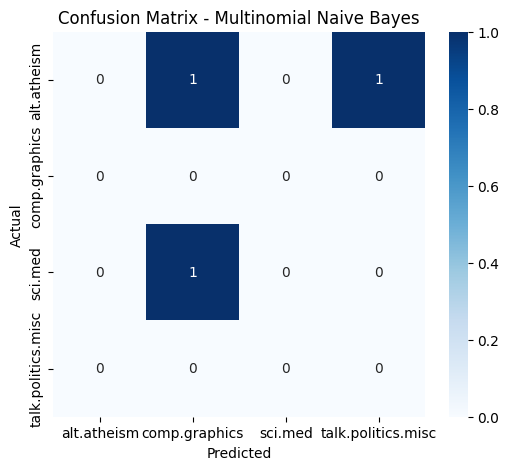

In [47]:
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Simulated 20 Newsgroups dataset
# -------------------------------
X = [
    "God does not exist",                    # alt.atheism
    "Atheism is a lack of belief in God",    # alt.atheism
    "3D graphics rendering using OpenGL",    # comp.graphics
    "Computer graphics cards are evolving",  # comp.graphics
    "Medical breakthroughs in cancer research", # sci.med
    "Doctors recommend regular checkups",       # sci.med
    "Politics in the USA are complex",       # talk.politics.misc
    "Government policies affect economy",    # talk.politics.misc
    "New AI algorithms improve computing",   # comp.graphics
    "Atheists debate religious philosophies",# alt.atheism
    "Healthcare systems vary worldwide",     # sci.med
    "Elections influence political decisions" # talk.politics.misc
]

# Labels corresponding to categories
# 0 = alt.atheism, 1 = comp.graphics, 2 = sci.med, 3 = talk.politics.misc
y = [0,0,1,1,2,2,3,3,1,0,2,3]

categories = ['alt.atheism', 'comp.graphics', 'sci.med', 'talk.politics.misc']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# -------------------------------
# Pipeline: TF-IDF + MultinomialNB
# -------------------------------
model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# -------------------------------
# Evaluation
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=categories))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()



27. Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually.

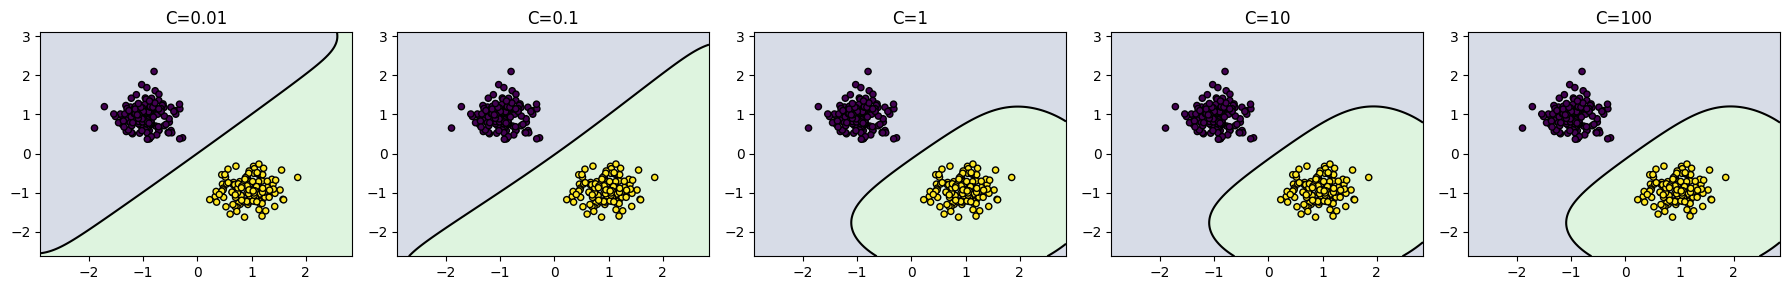

In [9]:
# svm_c_values_visualize.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.1, random_state=42)
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

Cs = [0.01, 0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(Cs), figsize=(18,3))
xx, yy = np.meshgrid(np.linspace(X_s[:,0].min()-1, X_s[:,0].max()+1, 300),
                     np.linspace(X_s[:,1].min()-1, X_s[:,1].max()+1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

for ax, C in zip(axes, Cs):
    clf = SVC(kernel='rbf', C=C, gamma='scale', random_state=42).fit(X_s, y)
    Z = clf.decision_function(grid).reshape(xx.shape)
    ax.contourf(xx, yy, Z > 0, alpha=0.2)
    ax.contour(xx, yy, Z, levels=[0], colors='k')
    ax.scatter(X_s[:,0], X_s[:,1], c=y, edgecolors='k', s=20)
    ax.set_title(f"C={C}")
plt.tight_layout()
plt.show()


28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features.

In [10]:
# bernoulli_nb_binary.py
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.preprocessing import Binarizer

# synthetic binary-feature dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, random_state=42)
# Binarize features by thresholding at 0
binarizer = Binarizer(threshold=0.0)
X_bin = binarizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, random_state=42, stratify=y)
clf = BernoulliNB(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       100
           1       0.76      0.76      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



29. Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data.

In [11]:
# svm_scaling_compare.py
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Unscaled SVM
clf_unscaled = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)
pred_unscaled = clf_unscaled.predict(X_test)

# Scaled SVM
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
clf_scaled = SVC(kernel='rbf', gamma='scale').fit(X_train_s, y_train)
pred_scaled = clf_scaled.predict(X_test_s)

print("Unscaled accuracy:", accuracy_score(y_test, pred_unscaled))
print("Scaled accuracy:", accuracy_score(y_test, pred_scaled))


Unscaled accuracy: 0.7111111111111111
Scaled accuracy: 0.9777777777777777


30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing.

In [38]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train GaussianNB without smoothing
gnb = GaussianNB(var_smoothing=1e-9)  # very small default smoothing
gnb.fit(X_train, y_train)
y_pred_no_smooth = gnb.predict(X_test)
acc_no_smooth = accuracy_score(y_test, y_pred_no_smooth)
print("Predictions without smoothing:", y_pred_no_smooth)
print("Accuracy without smoothing:", acc_no_smooth)

# 2. Train GaussianNB with increased "Laplace-like" smoothing
gnb_smooth = GaussianNB(var_smoothing=1e-2)  # higher smoothing
gnb_smooth.fit(X_train, y_train)
y_pred_smooth = gnb_smooth.predict(X_test)
acc_smooth = accuracy_score(y_test, y_pred_smooth)
print("\nPredictions with smoothing:", y_pred_smooth)
print("Accuracy with smoothing:", acc_smooth)


Predictions without smoothing: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy without smoothing: 1.0

Predictions with smoothing: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy with smoothing: 1.0


31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel).

In [13]:
# svm_gridsearch.py
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report

data = load_digits()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)
print("Test set performance:\n", classification_report(y_test, grid.predict(X_test)))


Best params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV score: 0.989559136662795
Test set performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.97      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy.

In [14]:
# svm_class_weight.py
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import numpy as np

X, y = make_classification(n_samples=2000, weights=[0.95, 0.05], n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Without class_weight
clf_none = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42).fit(X_train, y_train)

# With class_weight='balanced'
clf_bal = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42).fit(X_train, y_train)

print("Without class weights:\n", classification_report(y_test, clf_none.predict(X_test)))
print("With class weights:\n", classification_report(y_test, clf_bal.predict(X_test)))


Without class weights:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       379
           1       0.89      0.38      0.53        21

    accuracy                           0.96       400
   macro avg       0.93      0.69      0.76       400
weighted avg       0.96      0.96      0.96       400

With class weights:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       379
           1       0.55      0.57      0.56        21

    accuracy                           0.95       400
   macro avg       0.76      0.77      0.77       400
weighted avg       0.95      0.95      0.95       400



33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [15]:
# nb_spam_detection.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Example: use a small CSV 'spam.csv' with columns ['label','text'] where label in {'spam','ham'}
# df = pd.read_csv('spam.csv', encoding='latin-1')[['v1','v2']].rename(columns={'v1':'label','v2':'text'})

# For demonstration, create a tiny dataset
data = {
    'text': [
        "Win a free iPhone now", "Meeting at 10 am", "Lowest prices on meds", "Are we still on for lunch?",
        "Earn money from home", "Your invoice is attached", "Limited time offer", "Project update attached"
    ],
    'label': ['spam','ham','spam','ham','spam','ham','spam','ham']
}
df = pd.DataFrame(data)

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42, stratify=df['label'])

pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1.0)),
])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


Accuracy: 0.5
              precision    recall  f1-score   support

         ham       0.50      1.00      0.67         1
        spam       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy.

In [16]:
# svm_vs_nb_compare.py
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data = load_digits()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)

print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))
print("Naive Bayes Accuracy:", accuracy_score(y_test, gnb.predict(X_test)))
print("SVM report:\n", classification_report(y_test, svm.predict(X_test)))
print("GNB report:\n", classification_report(y_test, gnb.predict(X_test)))


SVM Accuracy: 0.9916666666666667
Naive Bayes Accuracy: 0.8111111111111111
SVM report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

GNB report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.69      0.8

35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results.

In [18]:
# rfe_nb_compare.py
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# RFE with logistic regression to select top 10 features
est = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(est, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

gnb_full = GaussianNB().fit(X_train, y_train)
gnb_sel  = GaussianNB().fit(X_train_sel, y_train)

print("GNB full features accuracy:", accuracy_score(y_test, gnb_full.predict(X_test)))
print("GNB after RFE accuracy:", accuracy_score(y_test, gnb_sel.predict(X_test_sel)))



GNB full features accuracy: 0.9385964912280702
GNB after RFE accuracy: 0.9385964912280702


36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy.

In [19]:
# svm_ovr_ovo.py
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

svm_base = SVC(kernel='linear', C=1.0)
ovr = OneVsRestClassifier(svm_base).fit(X_train, y_train)
ovo = OneVsOneClassifier(SVC(kernel='linear', C=1.0)).fit(X_train, y_train)

print("One-vs-Rest accuracy:", accuracy_score(y_test, ovr.predict(X_test)))
print("One-vs-One accuracy:", accuracy_score(y_test, ovo.predict(X_test)))


One-vs-Rest accuracy: 0.9555555555555556
One-vs-One accuracy: 0.9555555555555556


37.  Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy.

In [36]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define different kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = {}

# Train and evaluate SVM with different kernels
for kernel in kernels:
    svm_clf = SVC(kernel=kernel, C=1.0, random_state=42)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc
    print(f"Accuracy with {kernel} kernel: {acc:.4f}")

# Comparison table
print("\nKernel Comparison:")
for k, v in accuracies.items():
    print(f"{k.capitalize():<10}: {v:.4f}")




Accuracy with linear kernel: 0.9561
Accuracy with poly kernel: 0.8684
Accuracy with rbf kernel: 0.9825

Kernel Comparison:
Linear    : 0.9561
Poly      : 0.8684
Rbf       : 0.9825


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy.

In [21]:
# svm_stratified_cv.py
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

X, y = load_digits(return_X_y=True)
clf = SVC(kernel='rbf', gamma='scale', C=1.0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy', n_jobs=-1)
print("CV scores:", scores)
print("Average accuracy:", np.mean(scores))


CV scores: [0.98611111 0.99166667 0.98885794 0.99164345 0.98050139]
Average accuracy: 0.9877561126586197


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance.

In [22]:
# nb_priors_compare.py
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# default priors (estimated from data)
gnb_default = GaussianNB().fit(X_train, y_train)

# uniform priors
n_classes = len(set(y))
gnb_uniform = GaussianNB(priors=[1.0/n_classes]*n_classes).fit(X_train, y_train)

print("Default priors accuracy:", accuracy_score(y_test, gnb_default.predict(X_test)))
print("Uniform priors accuracy:", accuracy_score(y_test, gnb_uniform.predict(X_test)))


Default priors accuracy: 0.9666666666666667
Uniform priors accuracy: 0.9666666666666667


40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy.

In [23]:
# rfe_svm.py
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_est = SVC(kernel='linear')
rfe = RFE(svm_est, n_features_to_select=10)
rfe.fit(X_train, y_train)

svm_full = SVC(kernel='linear').fit(X_train, y_train)
svm_rfe  = SVC(kernel='linear').fit(rfe.transform(X_train), y_train)

print("SVM full features accuracy:", accuracy_score(y_test, svm_full.predict(X_test)))
print("SVM after RFE accuracy:", accuracy_score(y_test, svm_rfe.predict(rfe.transform(X_test))))


SVM full features accuracy: 0.956140350877193
SVM after RFE accuracy: 0.9122807017543859


41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy.

In [24]:
# svm_precision_recall_f1.py
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

In [25]:
# nb_log_loss.py
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

gnb = GaussianNB().fit(X_train, y_train)
y_prob = gnb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_prob))


Log Loss: 0.029238356071386116


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

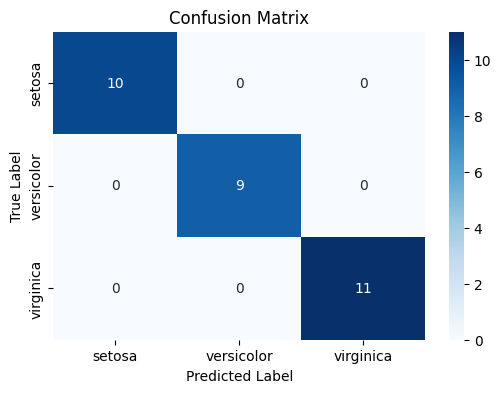

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [34]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names  # get class names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train SVM classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict
y_pred = svm_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=class_names))



44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

In [30]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Sample dataset (replace with your own data)
# X = features, y = target
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.5, 3.1, 2.9, 4.2, 5.0, 5.8, 6.5, 7.9, 8.2, 9.5])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Optional: Print predictions vs actual values
print("Predictions:", y_pred)
print("Actual values:", y_test)



Mean Absolute Error (MAE): 0.9398929601633472
Predictions: [8.94675138 1.96696546]
Actual values: [8.2 3.1]


45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score.

In [28]:
# nb_roc_auc.py
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

X, y = load_digits(return_X_y=True)
y_bin = label_binarize(y, classes=range(10))
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

gnb = GaussianNB().fit(X_train, y_train_bin.argmax(axis=1))  # fit on labels
y_prob = gnb.predict_proba(X_test)
# For multiclass, compute macro-average ROC-AUC
print("ROC-AUC (approx):", roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr'))


ROC-AUC (approx): 0.9842412046437353


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

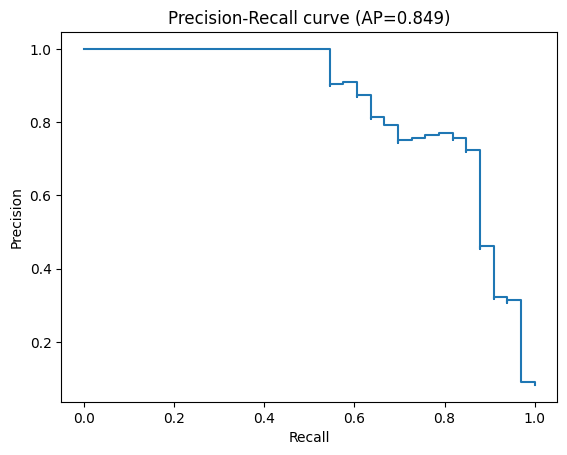

In [29]:
# svm_precision_recall_curve.py
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score

X, y = make_classification(n_samples=2000, n_classes=2, weights=[0.9,0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel='rbf', probability=True).fit(X_train, y_train)
y_scores = clf.predict_proba(X_test)[:,1]

prec, rec, _ = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

plt.step(rec, prec, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AP={ap:.3f})')
plt.show()
